# Chapter: 7
## Section: Fairness assessment and improvement in Python

In [ ]:
!pip install 'aif360'
!pip install fairlearn

In [2]:
import matplotlib.pyplot as plt
from matplotlib import tri
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier as RF

# importing Reject option classification, a postprocessing technique that gives
# favorable outcomes to unpriviliged groups and unfavorable outcomes to
# priviliged groups in a confidence band around the decision boundary
# with the highest uncertainty
from aif360.sklearn.postprocessing import RejectOptionClassifierCV
# importing PostProcessingMeta,  a meta-estimator which wraps a given
# estimator with a post-processing step.
from aif360.sklearn.postprocessing import PostProcessingMeta
from aif360.sklearn.datasets import fetch_adult
from aif360.algorithms.postprocessing.reject_option_classification import _get_pareto_frontier

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[LawSchoolGPA]'


In [3]:
# fetching adult dataset from aif360 library
X, y, sample_weight = fetch_adult()
X.index = pd.MultiIndex.from_arrays(X.index.codes, names=X.index.names)
y.index = pd.MultiIndex.from_arrays(y.index.codes, names=y.index.names)
y = pd.Series(y.factorize(sort=True)[0], index=y.index)
X = pd.get_dummies(X)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
metric = 'disparate_impact'
ppm = PostProcessingMeta(RF(n_estimators = 10, random_state = 42),
        RejectOptionClassifierCV('sex', scoring=metric, step=0.02, n_jobs=-1))
ppm.fit(X, y)

PostProcessingMeta(estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=42),
                   postprocessor=RejectOptionClassifierCV(prot_attr='sex',
                                                          scoring='disparate_impact',
                                                          step=0.02))

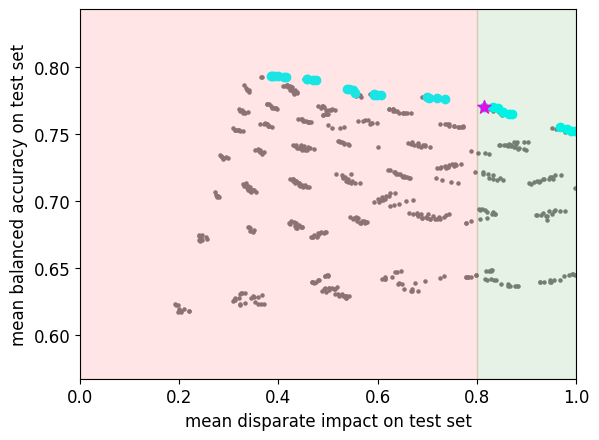

In [5]:
res = pd.DataFrame(ppm.postprocessor_.cv_results_)
ax = res.plot.scatter('mean_test_'+metric, 'mean_test_bal_acc', c='gray', marker='.')

all_pts = res[['mean_test_'+metric, 'mean_test_bal_acc']].to_numpy()
pareto_idx = _get_pareto_frontier(all_pts)
ax.scatter(all_pts[pareto_idx, 0], all_pts[pareto_idx, 1], c='cyan')

# identifying the best index considering both performance and
# disparate impatc on test set
refit_idx = ppm.postprocessor_.best_index_

# The starred point represents the best params chosen by the refitting protocol.
ax.scatter(all_pts[refit_idx, 0], all_pts[refit_idx, 1], s=100, c='magenta', marker='*')
ba = res.mean_test_bal_acc
ax.fill_betweenx([ba.min()-0.05, ba.max()+0.05], 1, 0.8, color='g', alpha=0.1)
ax.fill_betweenx([ba.min()-0.05, ba.max()+0.05], 0.8, color='r', alpha=0.1)
plt.xlabel("mean disparate impact on test set",fontsize = 12)
plt.ylabel("mean balanced accuracy on test set",fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.margins(0)